In [29]:
import pandas as pd
import numpy as np
import nltk, re
from nltk.corpus import stopwords
import pprint, string, sklearn,spacy
from nltk.tokenize import sent_tokenize,word_tokenize

from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [30]:
def remove_noise(text):
    digitspattern = r'[0-9]'
    text = re.sub(digitspattern, '', text)
    clean_string = "".join([w for w in text if w.lower() not in string.punctuation])
    
    return clean_string

In [31]:
text = "This data is }}{ not clean  dont because tto55555 lslfjsl64t !!!!"
remove_noise(text)

'This data is  not clean  dont because tto lslfjslt '

In [32]:
# lemmatization and Stemming 
import spacy
text = "Firstly, the company took my money and sent me an email telling me the product was shipped in a timely"
en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()
doc_spacy = en_nlp(text)

print("The original sentence : ")
print(word_tokenize(text))
print()
print("Lemmatization :")
print([token.lemma_  for token in doc_spacy])
print()
print("Stemming : ")

print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

The original sentence : 
['Firstly', ',', 'the', 'company', 'took', 'my', 'money', 'and', 'sent', 'me', 'an', 'email', 'telling', 'me', 'the', 'product', 'was', 'shipped', 'in', 'a', 'timely']

Lemmatization :
['firstly', ',', 'the', 'company', 'take', 'my', 'money', 'and', 'send', 'I', 'an', 'email', 'tell', 'I', 'the', 'product', 'be', 'ship', 'in', 'a', 'timely']

Stemming : 
['firstli', ',', 'the', 'compani', 'took', 'my', 'money', 'and', 'sent', 'me', 'an', 'email', 'tell', 'me', 'the', 'product', 'wa', 'ship', 'in', 'a', 'time']


In [98]:
from nltk.stem import WordNetLemmatizer
def Lemmatizer(list_of_words):
    Lemma = WordNetLemmatizer()
    for index,words in enumerate(list_of_words):
        list_of_words[index] = Lemma.lemmatize(words)
        
    return list_of_words

In [35]:
text = ["birds","bird","sing","name","names", "drives","drive"]
Lemmatizer(text)

['name', 'drive', 'bird', 'sing']

In [48]:
# word tokenization and Sentence tokenization

print("The sentence token is:")
print()
text = """First of all, the company took my money and sent me an email telling me the product was shipped.
A week and a half later I received another email telling me that they are sorry, but they don't actually 
have any of these items"""
sent_token = sent_tokenize(text)
print(sent_token)

print()
print("The word token is : ")
print()
text = reviews[0]
word_token = word_tokenize(text)
print(word_token)

The sentence token is:

['First of all, the company took my money and sent me an email telling me the product was shipped.', "A week and a half later I received another email telling me that they are sorry, but they don't actually \nhave any of these items"]

The word token is : 

['First', 'of', 'all', ',', 'the', 'company', 'took', 'my', 'money', 'and', 'sent', 'me', 'an', 'email', 'telling', 'me', 'the', 'product', 'was', 'shipped', '.', 'A', 'week', 'and', 'a', 'half', 'later', 'I', 'received', 'another', 'email', 'telling', 'me', 'that', 'they', 'are', 'sorry', ',', 'but', 'they', 'do', "n't", 'actually', 'have', 'any', 'of', 'these', 'items', ',', 'and', 'if', 'I', 'received', 'an', 'email', 'telling', 'me', 'it', 'has', 'shipped', ',', 'it', 'was', 'a', 'mistake.When', 'I', 'finally', 'got', 'my', 'money', 'back', ',', 'I', 'went', 'through', 'another', 'company', 'to', 'buy', 'the', 'product', 'and', 'it', 'wo', "n't", 'work', 'with', 'my', 'phone', ',', 'even', 'though', 'it',

In [49]:
# Remove Stops words
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
stop_words = set(stopwords.words('english'))
my_stop_words = set(["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'])
stop_words = stop_words.union(my_stop_words)

def removestopwords(word_tokens):
    filtered_sentence = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            if len(w) != 1:
                filtered_sentence.append(w.lower())
    return filtered_sentence

In [54]:
text = "First of all, the company took my money and sent me an email telling me the product was shipped."
word_tokens = word_tokenize(text)
removestopwords(word_tokens)

['first',
 'company',
 'took',
 'money',
 'sent',
 'email',
 'telling',
 'product',
 'shipped']

In [75]:
# Comments are the documents 
with open('Cell_Phones.txt','r',encoding='latin-1') as f:
    data = f.read()

df=pd.DataFrame([
    {line.split(': ')[0]:': '.join(line.split(': ')[1:]) 
     for line in record.split('\n')}
    for record in data.split('\n\n')])

In [76]:
df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se...",NaN
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,NaN
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...,NaN
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....,NaN
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...,NaN


In [77]:
df = df[df["review/score"].notna()]

In [84]:
df

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se...",NaN
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,NaN
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...,NaN
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....,NaN
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...,NaN
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...,NaN
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...,NaN
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...,NaN


In [79]:
reviews = df.iloc[0:1000,9].values

In [99]:
def list_of_tokens(reviews):
    list_of_word_tokens = []
    for review in reviews:
        review = remove_noise(review)
        tokens = word_tokenize(review)
        list_of_word_tokens += removestopwords(tokens)
        #print(list_of_word_tokens)
    return list_of_word_tokens

In [102]:
list_of_word_tokens = Lemmatizer(list_of_tokens(reviews))

In [103]:
from nltk.probability import FreqDist
fdist = FreqDist(list_of_word_tokens)
print(fdist)

<FreqDist with 5709 samples and 39883 outcomes>


In [104]:
pprint.pprint(fdist.most_common(50))

[('phone', 982),
 ('ear', 537),
 ('one', 439),
 ('battery', 400),
 ('headset', 387),
 ('fit', 368),
 ('case', 347),
 ('use', 322),
 ('great', 316),
 ('work', 314),
 ('like', 280),
 ('get', 262),
 ('good', 261),
 ('time', 224),
 ('product', 217),
 ('well', 210),
 ('jawbone', 208),
 ('dont', 206),
 ('bluetooth', 193),
 ('problem', 166),
 ('better', 154),
 ('call', 154),
 ('bought', 152),
 ('new', 151),
 ('jabra', 150),
 ('also', 148),
 ('day', 147),
 ('got', 144),
 ('even', 144),
 ('sound', 143),
 ('make', 137),
 ('first', 136),
 ('thing', 136),
 ('little', 134),
 ('quality', 134),
 ('charge', 132),
 ('much', 129),
 ('used', 127),
 ('buy', 126),
 ('price', 126),
 ('using', 126),
 ('really', 125),
 ('ive', 124),
 ('small', 124),
 ('charger', 123),
 ('still', 121),
 ('piece', 119),
 ('im', 117),
 ('size', 115),
 ('back', 106)]


C:\Users\olamide\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


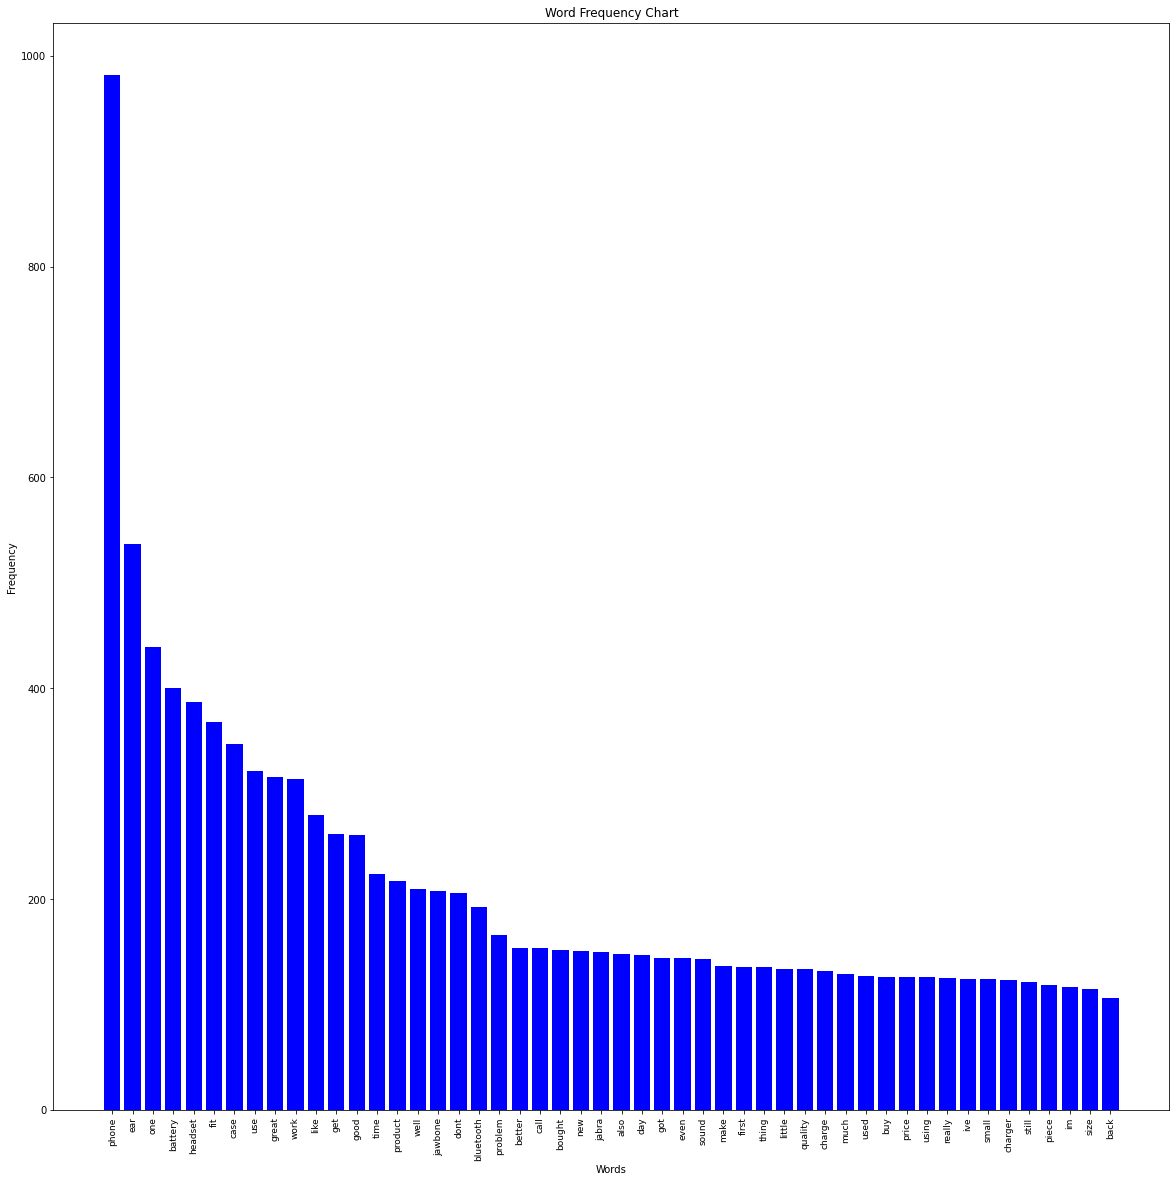

In [116]:
plt.rcParams["figure.figsize"] = [20,20]
zipped_data = list(zip(*fdist.most_common(50)))
words = zipped_data[0]
freqs = zipped_data[1]
ax=plt.axes(frameon=True)
#ax.set_xticks(len(words))
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(words, freqs, color='b')
plt.show()


In [131]:
reviews = df.iloc[0:1000,9].values
ratings = df.iloc[0:1000,6].values
ratings = np.array([1 if float(rating) >= 3 else 0 for rating in ratings])

In [132]:
from sklearn.model_selection import train_test_split
(X_train_text,X_test_text,y_train,y_test) = train_test_split(reviews,ratings, test_size = 0.3,random_state = 2000)

In [133]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(reviews)

In [134]:
X_train_token  = tokenizer.texts_to_sequences(X_train_text)
X_test_token = tokenizer.texts_to_sequences(X_test_text)

In [135]:
token_string = tokenizer.word_index
Inverse_map = dict(zip(token_string.values(), token_string.keys()))

In [136]:
def token_to_text(tokens):
    strings = [Inverse_map[token] for token in tokens if token != 0]
    text = " ".join(strings)
    return text

In [137]:
len_max = 241
#Padding the sequence 
X_train_pad = pad_sequences(X_train_token, maxlen = len_max, padding = 'pre')
X_test_pad = pad_sequences(X_test_token, maxlen = len_max, padding ='pre')

In [138]:
#Model
embedding_size = 20
Model = Sequential()
Model.add(Embedding(input_dim = 20000, input_length = len_max, output_dim = embedding_size, name = 'Embedding_Layer'))
Model.add(GRU(units = 16, return_sequences = True, name='First_Layer'))
Model.add(GRU(units = 8, return_sequences = True, name ='Second_layer'))
Model.add(GRU(units = 4, name = "Third_Layer"))
Model.add(Dense(1, activation = 'sigmoid', name ="Dense_Layer"))
optimizer = Adam(learning_rate = 0.001)
Model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_Layer (Embedding)  (None, 241, 20)          400000    
                                                                 
 First_Layer (GRU)           (None, 241, 16)           1824      
                                                                 
 Second_layer (GRU)          (None, 241, 8)            624       
                                                                 
 Third_Layer (GRU)           (None, 4)                 168       
                                                                 
 Dense_Layer (Dense)         (None, 1)                 5         
                                                                 
Total params: 402,621
Trainable params: 402,621
Non-trainable params: 0
_________________________________________________________________


In [148]:
#Fitting the model
Model.fit(X_train_pad, y_train, validation_split = 0.05,epochs =25, batch_size = 32)
Model.summary()

Epoch 1/25
21/21 [==============================] - 8s 398ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.6901 - val_accuracy: 0.7714
Epoch 2/25
21/21 [==============================] - 8s 391ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.7146 - val_accuracy: 0.8000
Epoch 3/25
21/21 [==============================] - 9s 425ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.7630 - val_accuracy: 0.7429
Epoch 4/25
21/21 [==============================] - 10s 454ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.7608 - val_accuracy: 0.7714
Epoch 5/25
21/21 [==============================] - 8s 385ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.7749 - val_accuracy: 0.7714
Epoch 6/25
21/21 [==============================] - 9s 422ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.7960 - val_accuracy: 0.7714
Epoch 7/25
21/21 [==============================] - 9s 431ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.7984 - val_accuracy: 0.7714
Epoch

In [149]:
def classifier(text):
    text_seq = tokenizer.texts_to_sequences(text)
    text_token = pad_sequences(text_seq, maxlen = len_max, padding = 'pre')
    pred = Model.predict(text_token)

    return pred

In [150]:
result = Model.evaluate(X_train_pad,y_train)
Evaluate = Model.evaluate(X_test_pad,y_test)
print("The accuracy on the training set is {0:.2%}".format(result[1]))
print("The accuracy on the test set is {0:.2%}".format(Evaluate[1]))

10/10 [==============================] - 1s 75ms/step - loss: 1.2127 - accuracy: 0.7000
The accuracy on the training set is 98.71%
The accuracy on the test set is 70.00%


In [151]:
text = ["The phone is very good"]
print(classifier(text))

1/1 [==============================] - 0s 103ms/step
[[0.7665859]]


In [155]:
# Using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(min_df = 10,stop_words=stopwords.words('english'), max_features= 10000)
vectorizer.fit(reviews)
text_transform = vectorizer.transform(reviews)

In [156]:
pprint.pprint(vectorizer.vocabulary_)

{'10': 0,
 '100': 1,
 '15': 2,
 '20': 3,
 '30': 4,
 '50': 5,
 '650': 6,
 'able': 7,
 'absolutely': 8,
 'access': 9,
 'accessories': 10,
 'actually': 11,
 'adapter': 12,
 'adjust': 13,
 'advertised': 14,
 'ago': 15,
 'aliph': 16,
 'allow': 17,
 'allows': 18,
 'almost': 19,
 'along': 20,
 'already': 21,
 'also': 22,
 'although': 23,
 'always': 24,
 'amazing': 25,
 'amazon': 26,
 'annoying': 27,
 'another': 28,
 'answer': 29,
 'antenna': 30,
 'anymore': 31,
 'anyone': 32,
 'anything': 33,
 'anyway': 34,
 'appears': 35,
 'area': 36,
 'around': 37,
 'arrived': 38,
 'attached': 39,
 'audio': 40,
 'available': 41,
 'away': 42,
 'awesome': 43,
 'ax2': 44,
 'back': 45,
 'background': 46,
 'bad': 47,
 'bar': 48,
 'barely': 49,
 'based': 50,
 'basic': 51,
 'batteries': 52,
 'battery': 53,
 'behind': 54,
 'believe': 55,
 'belt': 56,
 'best': 57,
 'better': 58,
 'big': 59,
 'bit': 60,
 'black': 61,
 'blackberry': 62,
 'blue': 63,
 'bluetooth': 64,
 'body': 65,
 'book': 66,
 'bottom': 67,
 'bought':

In [159]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components= 8,learning_method = "online",max_iter = 30, random_state =2022)
document_topics = lda.fit_transform(text_transform)

In [160]:
feature_names = np.array(vectorizer.get_feature_names_out()) 

for topic_idx,topic in enumerate(lda.components_):
    print()
    print( f"Topic {topic_idx}")
    
    print()
    
    print(" ".join([feature_names[i] for i in topic.argsort()[:-30:-1]]))



Topic 0

phone battery nokia voice one cell life good reception calls call features use get phones free also hours easy car screen camera quality talk better charge using small new

Topic 1

ear would jawbone fit bought gels work great stay read came jabra reviews one new like stand put well good using clear even weeks eargels away money worked disappointed

Topic 2

case clip belt palm phone tx treo like use would well open fits cover leather looks screen one nice pda little broke plastic stylus pouch back bit easily get

Topic 3

headset ear jabra bluetooth sound one time use fit get quality range well even headsets work good hear using set better noise bt250 little comfortable others much put also

Topic 4

ear jawbone fit piece use one better eargels size fits eargel right would little product sizes well large place loop comfortable keep put work great without ring top come

Topic 5

great product works price perfect deal amazon exactly blackberry buy good use arrived highly shipp